# Training Convergence Plots for Learning Punctuation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
import pickle
import os
print(os.getcwd())
import time
import gc
import torch
import bisect

from conv_plots_funcs import train_conv_plots

#import empirical cdf
# import sys
# sys.path.append(os.path.abspath('../../src'))

from data_processing import gen_ckpt_steps, move_dict_to_device, get_other_err, get_mop_ratios_ckpt, compute_ratio
# sys.path.append(os.path.abspath('..'))

from check_ecdf import get_empirical_cdf

/home/sultand/TFs_do_KF_ICL/src


In [7]:
valA = "ident"
valC = "_ident_C"
state_dim = 5
ckpt_step = 8
batch_size = 512 #512 #4096
gpus=1
num_val_sys = 25
experiment = "250125_210849.09203d_multi_sys_trace_ident_state_dim_5_ident_C_lr_1.3207437987531975e-05_num_train_sys_40000" # experiment to load
datasource = "val"
nope = False


compute_more_ckpts = True

/home/sultand/TFs_do_KF_ICL/outputs/train_conv/training_dist_comparison_val_ident_state_dim_5_val_sys_25_1738032204.1656902.pdf
quantiles 5 path exists?: True
ckpt_steps: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400

findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


(array([0.46842408, 0.7629874 , 1.1743479 ], dtype=float32),
 [51200,
  102400,
  153600,
  204800,
  256000,
  307200,
  358400,
  409600,
  460800,
  512000,
  563200,
  614400,
  665600,
  716800,
  768000,
  819200,
  870400,
  921600,
  972800,
  1024000,
  1075200,
  1126400,
  1177600,
  1228800,
  1280000,
  1331200,
  1382400,
  1433600,
  1484800,
  1536000,
  1587200,
  1638400,
  1689600,
  1740800,
  1792000,
  1843200,
  1894400,
  1945600,
  1996800,
  2048000,
  2099200,
  2150400,
  2201600,
  2252800,
  2304000,
  2355200,
  2406400,
  2457600,
  2508800,
  2560000,
  2611200,
  2662400,
  2713600,
  2764800,
  2816000,
  2867200,
  2918400,
  2969600,
  3020800,
  3072000,
  3123200,
  3174400,
  3225600,
  3276800,
  3328000,
  3379200,
  3430400,
  3481600,
  3532800,
  3584000,
  3635200,
  3686400,
  3737600,
  3788800,
  3840000,
  3891200,
  3942400,
  3993600,
  4044800,
  4096000,
  4147200,
  4198400,
  4249600,
  4300800,
  4352000,
  4403200,
  4454400,
  

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

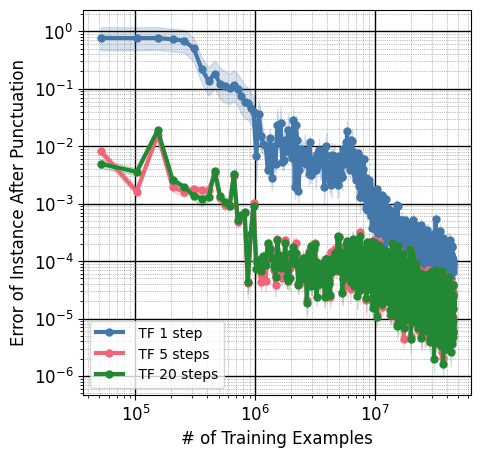

In [ ]:
kal_ckpt = 28500 #60000 #81000 #28500
train_conv_plots([experiment], ["Identity"], [kal_ckpt], valA, valC, num_val_sys, compute_more_ckpts, None, 100, 88400, 100, state_dim, single_system=True, nope=nope, batch_size=batch_size, gpus=gpus)